<a href="https://colab.research.google.com/github/erwincarlogonzales/CodingDojo/blob/main/Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
# load data
filename = '/content/drive/MyDrive/Colab Notebooks/nba.csv'
df = pd.read_csv(filename, index_col = 'Name')
df.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
Name,,,,,,,,,,,,,,,,,,,,
Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


Data cleaning

In [3]:
df.isna().sum()

GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64

In [4]:
df.dropna(inplace = True)

In [6]:
# define target y and features X
y = df['TARGET_5Yrs']
X = df.drop(columns = 'TARGET_5Yrs')

In [7]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3)

In [8]:
# instantiate scaler
scaler = StandardScaler()

# scale the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Create feedforward NN

In [9]:
# define NN structure
# save number of features as input shape
input_shape = X_train.shape[1]
input_shape

19

In [ ]:
# model without dropout
# instantiate the model
model = Sequential()

# create first hidden layer
model.add(Dense(19, input_dim = input_shape, activation = 'relu'))

# create second hidden layer
model.add(Dense(10, activation = 'relu'))

# create output layer
model.add(Dense(1, activation = 'sigmoid'))

# compile the model
model.compile(loss = 'bce', optimizer = 'adam')

# fit the model
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100)

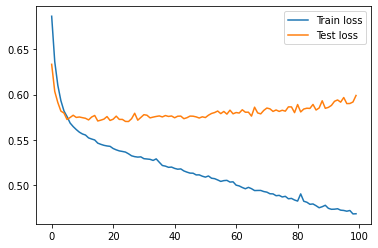

In [15]:
# visualize loss
plt.plot(history.history['loss'], label = 'Train loss')
plt.plot(history.history['val_loss'], label = 'Test loss')
plt.legend();

In [21]:
# # model with dropout
# instantitate the model
model = Sequential()

# create first hidden layer
model.add(Dense(19, input_dim = input_shape, activation = 'relu'))

# add dropout
model.add(Dropout(.2))

# create second hidden layer
model.add(Dense(10, activation = 'relu'))

# add dropout
model.add(Dropout(0.2))

# create second hidden layer
model.add(Dense(1, activation = 'sigmoid'))

# compile the model
model.compile(loss = 'bce', optimizer = 'adam')

# fit the model
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 8ms/step - loss: 0.9861 - val_loss: 0.7823
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7724 - val_loss: 0.6495
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6701 - val_loss: 0.5984
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6378 - val_loss: 0.5781
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6143 - val_loss: 0.5692
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6148 - val_loss: 0.5636
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6055 - val_loss: 0.5616
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6018 - val_loss: 0.5589
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.5840 - val_loss: 0.5575
Epoch 10/100
32/32 [==============================] - 0s 6ms/step - loss: 0.5934 - val_loss: 0.5594
Epoch 11/

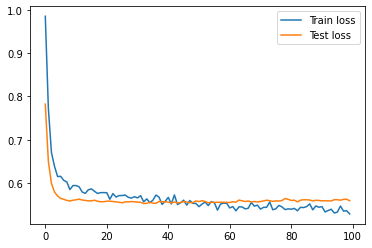

In [22]:
# visualize loss
plt.plot(history.history['loss'], label = 'Train loss')
plt.plot(history.history['val_loss'], label = 'Test loss')
plt.legend();